In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("atharvjairath/empathetic-dialogues-facebook-ai")

print("Path to dataset files:", path)

c:\Datascience study\Projects\Assignment_ml\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 3.26M/3.26M [00:01<00:00, 2.44MB/s]

Extracting files...


Path to dataset files: C:\Users\dharu\.cache\kagglehub\datasets\atharvjairath\empathetic-dialogues-facebook-ai\versions\1


In [4]:
import os
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        path=os.path.join(dirname, filename)
        print(os.path.join(dirname, filename))

C:\Users\dharu\.cache\kagglehub\datasets\atharvjairath\empathetic-dialogues-facebook-ai\versions\1\emotion-emotion_69k.csv


In [5]:
import pandas as pd
import numpy as np

df=pd.read_csv(path)

In [6]:
df.head()

,Unnamed: 0,Situation,emotion,empathetic_dialogues,labels,Unnamed: 5,Unnamed: 6
0,0,I remember going to the fireworks with my best...,sentimental,Customer :I remember going to see the firework...,"Was this a friend you were in love with, or ju...",NaN,NaN
1,1,I remember going to the fireworks with my best...,sentimental,Customer :This was a best friend. I miss her.\...,Where has she gone?,NaN,NaN
2,2,I remember going to the fireworks with my best...,sentimental,Customer :We no longer talk.\nAgent :,Oh was this something that happened because of...,NaN,NaN
3,3,I remember going to the fireworks with my best...,sentimental,Customer :Was this a friend you were in love w...,This was a best friend. I miss her.,NaN,NaN
4,4,I remember going to the fireworks with my best...,sentimental,Customer :Where has she gone?\nAgent :,We no longer talk.,NaN,NaN


In [8]:
df.shape

(64636, 7)

In [9]:
df.isna().sum()

Unnamed: 0                  0
Situation                   0
emotion                     4
empathetic_dialogues        0
labels                      0
Unnamed: 5              64523
Unnamed: 6              64631
dtype: int64

In [41]:
## Handling missing values 
mfr=df['emotion'].mode()[0]
df['emotion'].fillna(mfr,inplace=True)

In [42]:
df.isna().sum()

Situation               0
emotion                 0
empathetic_dialogues    0
labels                  0
dtype: int64

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64636 entries, 0 to 64635
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            64636 non-null  int64 
 1   Situation             64636 non-null  object
 2   emotion               64632 non-null  object
 3   empathetic_dialogues  64636 non-null  object
 4   labels                64636 non-null  object
 5   Unnamed: 5            113 non-null    object
 6   Unnamed: 6            5 non-null      object
dtypes: int64(1), object(6)
memory usage: 3.5+ MB


In [19]:
df.nunique()

Unnamed: 0              64636
Situation               19205
emotion                    43
empathetic_dialogues    63345
labels                  63225
Unnamed: 5                 92
Unnamed: 6                  5
dtype: int64

In [22]:
## DEFINING THE NUMBERICAL AND CATEGORICAL FEATURES
numericals=[feature for feature in df.columns if df[feature].dtype !='O']
categorical=[feature for feature in df.columns if df[feature].dtype =='O']

print(f'There are {len(numericals) } numerical features  {numericals}')
print(f'There are {len(categorical)} categorical features {categorical}')

There are 1 numerical features  ['Unnamed: 0']
There are 6 categorical features ['Situation', 'emotion', 'empathetic_dialogues', 'labels', 'Unnamed: 5', 'Unnamed: 6']


In [24]:
df.drop(columns=['Unnamed: 5','Unnamed: 6'],inplace=True)

In [25]:
df.head()

,Unnamed: 0,Situation,emotion,empathetic_dialogues,labels
0,0,I remember going to the fireworks with my best...,sentimental,Customer :I remember going to see the firework...,"Was this a friend you were in love with, or ju..."
1,1,I remember going to the fireworks with my best...,sentimental,Customer :This was a best friend. I miss her.\...,Where has she gone?
2,2,I remember going to the fireworks with my best...,sentimental,Customer :We no longer talk.\nAgent :,Oh was this something that happened because of...
3,3,I remember going to the fireworks with my best...,sentimental,Customer :Was this a friend you were in love w...,This was a best friend. I miss her.
4,4,I remember going to the fireworks with my best...,sentimental,Customer :Where has she gone?\nAgent :,We no longer talk.


In [26]:
df.describe()

,Unnamed: 0
count,64636.000000
mean,32317.500000
std,18658.950337
min,0.000000
25%,16158.750000
50%,32317.500000
75%,48476.250000
max,64635.000000


In [28]:
df.rename(columns={'Unnamed: 0': 'idx'},inplace=True)

In [35]:
df.drop(columns='idx',inplace=True)

In [36]:
df.head(2)

,Situation,emotion,empathetic_dialogues,labels
0,I remember going to the fireworks with my best...,sentimental,Customer :I remember going to see the firework...,"Was this a friend you were in love with, or ju..."
1,I remember going to the fireworks with my best...,sentimental,Customer :This was a best friend. I miss her.\...,Where has she gone?


In [31]:
print("\nLabels",df['labels'].unique())


Labels ['Was this a friend you were in love with, or just a best friend?'
 'Where has she gone?'
 'Oh was this something that happened because of an argument?' ...
 "Oh hey that's awesome!  That is awesome right?"
 'That is awesome!!!! Congratulations!'
 "It is soooo awesome.  We have been wanting a baby for so long.  I can't wait, but I was shocked out of a dead sleep!"]


In [32]:
print("situation--",df['Situation'].unique())

situation-- ['I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.'
 ' i used to scare for darkness'
 'I showed a guy how to run a good bead in welding class and he caught on quick.'
 ...
 'My house burned down and I had to rescue my family, It was a chilly night.'
 'I found some pictures of my grandma in the attic last night'
 'I woke up this morning to my wife telling me she was pregnant!']


In [33]:

print("emotion--",df['emotion'].unique())



emotion-- ['sentimental' 'afraid' 'proud' 'faithful' 'terrified' 'joyful' 'angry'
 'sad' 'jealous' 'grateful' 'prepared' 'embarrassed' 'excited' 'annoyed'
 'lonely' 'ashamed' 'guilty' 'surprised' 'nostalgic' 'confident' 'furious'
 'disappointed' 'caring' 'trusting' 'disgusted' 'anticipating' 'anxious'
 'hopeful' 'content' 'impressed' 'apprehensive' 'devastated'
 ' I really killed it!' ' we were in a different country'
 't even like scary things'
 't believe I like the show Power so much. I was never really into shows like that'
 nan ' time to jump on the motorcycle and go cruising!'
 " a boy.  I hear all these different labor stories that aren't exactly reassuring!  "
 't believe my daughter taught herself how to play the ukelele. I was amazed'
 't think I wold like super heroes'
 "m so mad with my brother. He stole from me and didn't think I would notice. "
 " but what I didn't know was that he was working in the next room with the door open.  He approached and asked what I had been s

In [34]:

print("empathetic",df['empathetic_dialogues'].unique())



empathetic ['Customer :I remember going to see the fireworks with my best friend. It was the first time we ever spent time alone together. Although there was a lot of people, we felt like the only people in the world.\nAgent :'
 'Customer :This was a best friend. I miss her.\nAgent :'
 'Customer :We no longer talk.\nAgent :' ...
 "Customer :I woke up this morning to my wife telling me she's pregnant!\nAgent :"
 "Customer :It is soooo awesome.  We have been wanting a baby for so long.  I can't wait, but I was shocked out of a dead sleep!\nAgent :"
 "Customer :Oh hey that's awesome!  That is awesome right?\nAgent :"]


## Standardizing the texts

In [69]:

import re
df['Situation'] = df['Situation'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x).lower()))
df['empathetic_dialogues'] = df['empathetic_dialogues'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x).lower()))
df['labels'] = df['labels'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x).lower()))


In [57]:

df['empathetic_dialogues'] = df['empathetic_dialogues'].str.replace(r'^customer\s*\s*', '', regex=True)


print(df['empathetic_dialogues'].head())


0    i remember going to see the fireworks with my ...
1            this was a best friend i miss her\nagent 
2                            we no longer talk\nagent 
3    was this a friend you were in love with or jus...
4                           where has she gone\nagent 
Name: empathetic_dialogues, dtype: object


In [70]:
df.head()

,Situation,emotion,empathetic_dialogues,labels,text_length
0,i remember going to the fireworks with my best...,sentimental,i remember going to see the fireworks with my ...,was this a friend you were in love with or jus...,117
1,i remember going to the fireworks with my best...,sentimental,this was a best friend i miss her\nagent,where has she gone,117
2,i remember going to the fireworks with my best...,sentimental,we no longer talk\nagent,oh was this something that happened because of...,117
3,i remember going to the fireworks with my best...,sentimental,was this a friend you were in love with or jus...,this was a best friend i miss her,117
4,i remember going to the fireworks with my best...,sentimental,where has she gone\nagent,we no longer talk,117


In [59]:
df['text_length'] = df['Situation'].apply(len)
print(df['text_length'].describe())


count    64595.000000
mean        85.458751
std         49.690965
min          1.000000
25%         53.000000
50%         74.000000
75%        105.000000
max        537.000000
Name: text_length, dtype: float64


In [60]:
df.head()

,Situation,emotion,empathetic_dialogues,labels,text_length
0,i remember going to the fireworks with my best...,sentimental,i remember going to see the fireworks with my ...,"Was this a friend you were in love with, or ju...",117
1,i remember going to the fireworks with my best...,sentimental,this was a best friend i miss her\nagent,Where has she gone?,117
2,i remember going to the fireworks with my best...,sentimental,we no longer talk\nagent,Oh was this something that happened because of...,117
3,i remember going to the fireworks with my best...,sentimental,was this a friend you were in love with or jus...,This was a best friend. I miss her.,117
4,i remember going to the fireworks with my best...,sentimental,where has she gone\nagent,We no longer talk.,117


## Visualizing and cleaning emotion column

C:\Users\dharu\AppData\Local\Temp\ipykernel_26032\3766318622.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='emotion', data=df, palette='viridis')


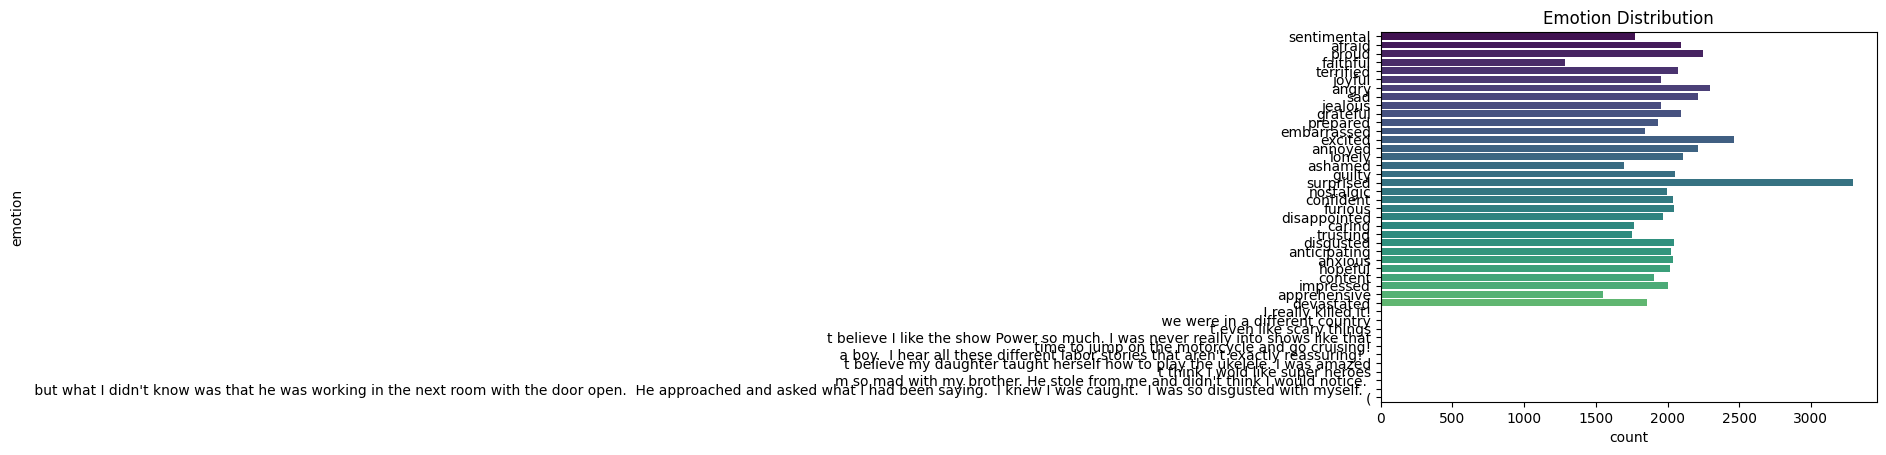

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(y='emotion', data=df, palette='viridis')
plt.title('Emotion Distribution')
plt.show()


In [43]:
valid_emotions = ['sentimental', 'afraid', 'proud', 'faithful', 'terrified', 'joyful',
                  'angry', 'sad', 'jealous', 'grateful', 'prepared', 'embarrassed',
                  'excited', 'annoyed', 'lonely', 'ashamed', 'guilty', 'surprised',
                  'nostalgic', 'confident', 'furious', 'disappointed', 'caring', 
                  'trusting', 'disgusted', 'anticipating', 'anxious', 'hopeful', 
                  'content', 'impressed', 'apprehensive', 'devastated']
df['emotion'] = df['emotion'].apply(lambda x: x if x in valid_emotions else np.nan)

In [45]:
df.isna().sum()

Situation                0
emotion                 41
empathetic_dialogues     0
labels                   0
dtype: int64

In [46]:
## Droping rows with Nan
df.dropna(subset=['emotion'], inplace=True)

C:\Users\dharu\AppData\Local\Temp\ipykernel_26032\2913287472.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='emotion', data=df, order=df['emotion'].value_counts().index, palette='coolwarm')


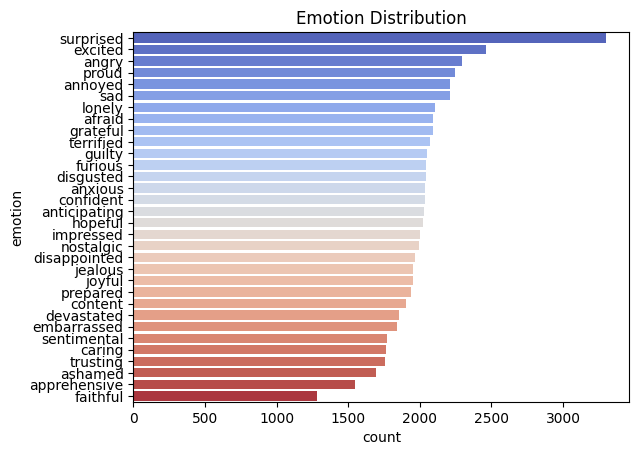

In [49]:
sns.countplot(y='emotion', data=df, order=df['emotion'].value_counts().index, palette='coolwarm')
plt.title('Emotion Distribution')
plt.show()


In [50]:
print(df['emotion'].value_counts())


emotion
surprised       3299
excited         2465
angry           2296
proud           2247
annoyed         2213
sad             2213
lonely          2106
afraid          2094
grateful        2091
terrified       2074
guilty          2053
furious         2045
disgusted       2044
anxious         2037
confident       2037
anticipating    2026
hopeful         2019
impressed       2004
nostalgic       1996
disappointed    1969
jealous         1955
joyful          1953
prepared        1937
content         1903
devastated      1856
embarrassed     1844
sentimental     1773
caring          1765
trusting        1755
ashamed         1694
apprehensive    1549
faithful        1283
Name: count, dtype: int64


## Visualizing text length distribution

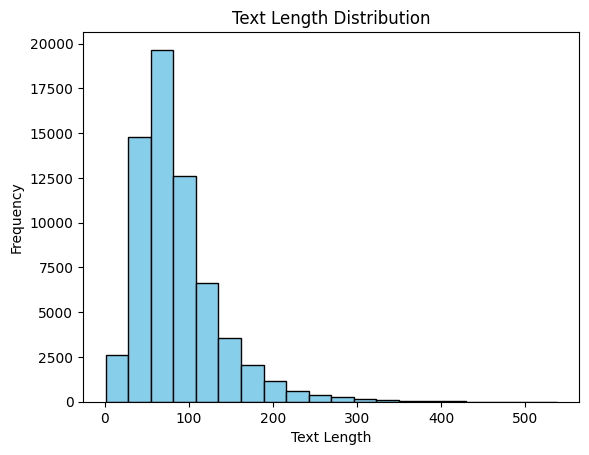

In [61]:
plt.hist(df['text_length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


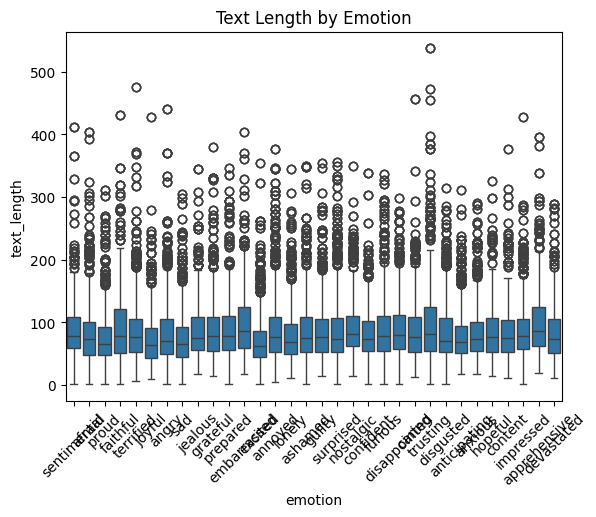

In [68]:
sns.boxplot(x='emotion', y='text_length', data=df)
plt.title('Text Length by Emotion')
plt.xticks(rotation=45)
plt.show()


## Performing wordcloud

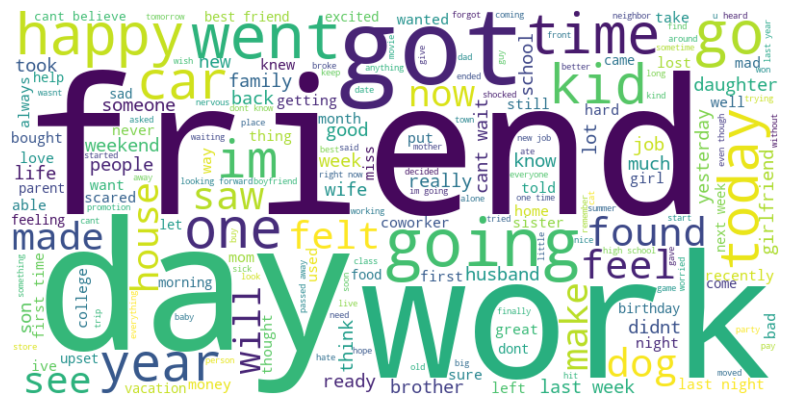

In [64]:
## Wordcloud for situation

from wordcloud import WordCloud
text = ' '.join(df['Situation'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


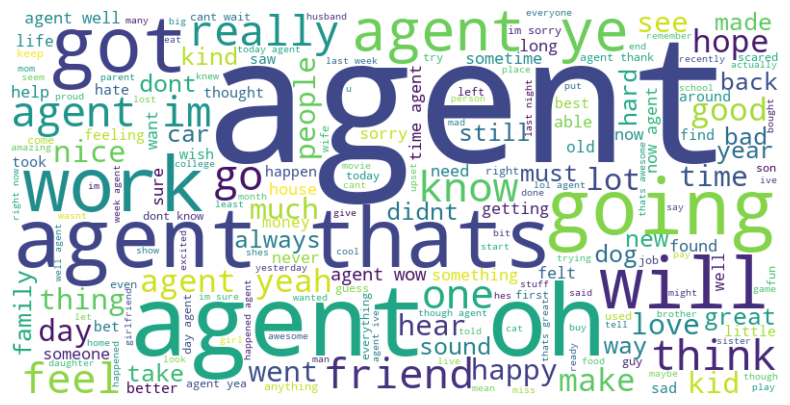

In [66]:
## wordcloud for empathetic_dialogue

text=''.join(df['empathetic_dialogues'])
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



## Renaming and proceed further

In [72]:
# Renaming the columns
df.rename(columns={
    'Situation': 'situation_text',
    'emotion': 'emotion_label',
    'empathetic_dialogues': 'user_queries',
    'labels': 'agent_responses'
}, inplace=True)

# Preview the updated DataFrame
df.head()


,situation_text,emotion_label,user_queries,agent_responses,text_length
0,i remember going to the fireworks with my best...,sentimental,i remember going to see the fireworks with my ...,was this a friend you were in love with or jus...,117
1,i remember going to the fireworks with my best...,sentimental,this was a best friend i miss her\nagent,where has she gone,117
2,i remember going to the fireworks with my best...,sentimental,we no longer talk\nagent,oh was this something that happened because of...,117
3,i remember going to the fireworks with my best...,sentimental,was this a friend you were in love with or jus...,this was a best friend i miss her,117
4,i remember going to the fireworks with my best...,sentimental,where has she gone\nagent,we no longer talk,117


In [73]:
print(df.isnull().sum())


situation_text     0
emotion_label      0
user_queries       0
agent_responses    0
text_length        0
dtype: int64


In [92]:
# Save the DataFrame to a CSV file
df.to_csv('Data.csv', index=False)
